# QCoDeS Drivers for Keysight AWG (M3202A) and Digitizer (M3102A) Demos

### Initial Setup (run before anything else)

In [1]:
import logging

import numpy as np
import matplotlib.pyplot as plt

try:
    import keysightSD1
except:
    import sys
    sys.path.append(r"C:\Program Files (x86)\Keysight\SD1\Libraries\Python")
    import keysightSD1
    
import qcodes
from qcodes_contrib_drivers.drivers.Keysight.M3202A import M3202A

import qcodes.logger as logger
from qcodes.logger import start_all_logging

from waveforms import create_sine, create_gaussian, queue_oneshot, trigger_fall

start_all_logging()
# logger.get_file_handler().setLevel(logging.DEBUG)

# try to close station from previous run.
try:
    station.close_all_registered_instruments()
except: pass

# setup station
awg = M3202A("AWG", chassis = 1, slot = 4)

station = qcodes.Station()
station.add_component(awg)

SAMPLE_RATE_MSPS = 1000 # 1 GS/s

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\noah\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


2021-05-21 18:17:27,773 ¦ qcodes.instrument.base ¦ WARNING ¦ base ¦ snapshot_base ¦ 215 ¦ [AWG(M3202A)] Snapshot: Could not update parameter: status


Qcodes Logfile : C:\Users\noah\.qcodes\logs\210521-21856-qcodes.log


## AWG Demos

Each of the following demos can be run independently in any order. These demos generate single-shot waveforms on the AWG channel 1.
These waveforms can be captured on an oscilloscope in single-shot trigger mode.

### 1. Sine Wave (Auto-trigger)

The cell below generates 8 periods of a sine wave with frequency 2 MHz (period 500 ns). The automatic trigger is used so the waveform is output immediately.

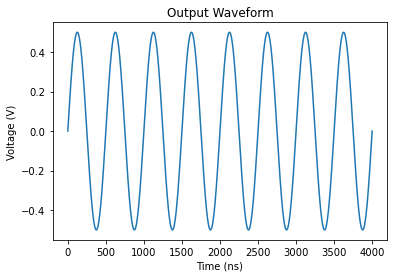

In [2]:
sine_wave = 0.5 * create_sine(500, 8, SAMPLE_RATE_MSPS)
plt.plot(sine_wave)
plt.title("Output Waveform")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")

queue_oneshot(awg, 1, sine_wave, SAMPLE_RATE_MSPS)

### 2. Gaussian Pulse (Auto-trigger)

The cell below generates a Gaussian pulse with a FWHM (full-width-half-max) of 100 ns. The automatic trigger is used so the waveform is output immediately.

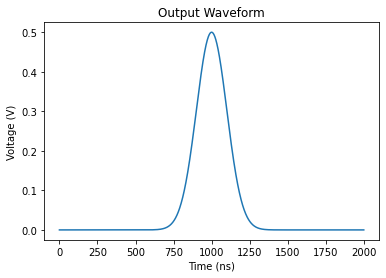

In [5]:
gauss_wave = create_gaussian(0.5, 0, 100, 2000, SAMPLE_RATE_MSPS)
plt.plot(gauss_wave)
plt.title("Output Waveform")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")

queue_oneshot(awg, 1, gauss_wave, SAMPLE_RATE_MSPS)

### 3. Gaussian Pulse (Ext-trigger)

The cell below generates the same Gaussian pulse as the previous demo. The external trigger (PXI trigger line 1) is used so the waveform is output only when we call `trigger_fall`.

In [4]:
queue_oneshot(awg, 1, gauss_wave, SAMPLE_RATE_MSPS, trigger=keysightSD1.SD_TriggerModes.EXTTRIG, trigger_pxi_line=1)
trigger_fall(awg, trigger_pxi_line=1)

## AWG + Digitizer Demos

Each of the following demos can be run independently in any order. These demos generate single-shot waveforms on the AWG channel 4 and read the digitizer input on channel 1, so you should connect these two ports via a coax cable. The two modules have their triggers synchronized by the PXI chassis trigger line 1.

### 1. Gaussian Pulse

In [ ]:
# Queue the waveform on the AWG
queue_oneshot(awg, 1, gauss_wave, SAMPLE_RATE_MSPS, trigger=keysightSD1.SD_TriggerModes.EXTTRIG, trigger_pxi_line=1)

# TODO setup digitizer

# Trigger both
trigger_fall(awg, trigger_pxi_line=1)